# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import train test split
from sklearn.model_selection import train_test_split

# Import PCA
from sklearn import decomposition

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
dynamically_generated_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')
us_elections_2020_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_final.csv')

In [3]:
convabuse.head()

,Unnamed: 0,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [5]:
dynamically_generated_hate_speech.head()

,Unnamed: 0,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,0,1.0,0,16,0,0,0,0,0,0,0,0,1,1
1,1,1.0,-1,9,0,0,0,0,0,0,1,0,0,1
2,2,1.0,-1,16,1,0,0,0,0,0,0,0,0,1
3,3,1.0,0,2,0,0,0,0,0,0,0,0,1,1
4,4,1.0,-1,17,1,0,0,0,0,0,0,0,0,1


In [6]:
dynamically_generated_hate_speech_X = dynamically_generated_hate_speech.drop("label", axis=1)
dynamically_generated_hate_speech_y = dynamically_generated_hate_speech["label"]

In [7]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [8]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [9]:
us_elections_2020_hate_speech.head()

,Unnamed: 0,index,Trump,Biden,HOF
0,0,873,1.0,4.0,1
1,1,2947,0.0,3.0,1
2,2,2274,0.0,4.0,1
3,3,902,1.0,4.0,1
4,4,554,4.0,1.0,1


In [10]:
us_elections_2020_hate_speech_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us_elections_2020_hate_speech_y = us_elections_2020_hate_speech["HOF"]

# PCA Modeling

In [11]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dynamically_generated_hate_speech_X_numeric = dynamically_generated_hate_speech_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us_elections_2020_hate_speech_X_numeric = us_elections_2020_hate_speech_X.select_dtypes(include=np.number)

In [12]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [13]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dynamically_generated_hate_speech_X_scaled = dghs_scaler.fit_transform(dynamically_generated_hate_speech_X_numeric)
dynamically_generated_hate_speech_X_scaled = pd.DataFrame(dynamically_generated_hate_speech_X_scaled, columns=dynamically_generated_hate_speech_X_numeric.columns)

In [14]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [15]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us_elections_2020_hate_speech_X_scaled = us2020hs_scaler.fit_transform(us_elections_2020_hate_speech_X_numeric)
us_elections_2020_hate_speech_X_scaled = pd.DataFrame(us_elections_2020_hate_speech_X_scaled, columns=us_elections_2020_hate_speech_X_numeric.columns)

In [16]:
for columns in [convabuse_X_numeric.columns, dynamically_generated_hate_speech_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us_elections_2020_hate_speech_X_numeric.columns]:
  print(columns)

Index(['Unnamed: 0', 'example_no', 'annotator_id', 'ableism', 'homophobic',
       'intellectual', 'racist', 'sexist', 'sex_harassment', 'transphobic',
       'generalised', 'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['Unnamed: 0', 'type', 'annotator', 'race_or_ethnicity', 'gender',
       'religion', 'lgbtq', 'nationality', 'age', 'disability', 'class',
       'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Unnamed: 0', 'index', 'Trump', 'Biden'], dtype='object')


In [17]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dynamically_generated_hate_speech_X_train, dynamically_generated_hate_speech_X_test, dynamically_generated_hate_speech_y_train, dynamically_generated_hate_speech_y_test = train_test_split(dynamically_generated_hate_speech_X_scaled, dynamically_generated_hate_speech_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
us_elections_2020_hate_speech_X_train, us_elections_2020_hate_speech_X_test, us_elections_2020_hate_speech_y_train, us_elections_2020_hate_speech_y_test = train_test_split(us_elections_2020_hate_speech_X_scaled, us_elections_2020_hate_speech_y, test_size=0.2, random_state=42)

In [18]:
# Perform PCA on the convabuse dataset
convabuse_pcas = decomposition.PCA(n_components=11)
convabuse_pcas.fit(convabuse_X_train)

PCA(n_components=11)

In [19]:
print(convabuse_pcas.explained_variance_ratio_)
print(np.sum(convabuse_pcas.explained_variance_ratio_))
print(convabuse_pcas.explained_variance_)

[0.19488889 0.10096478 0.09842998 0.08903902 0.08208927 0.07833748
 0.06860311 0.06073424 0.0501928  0.05002402 0.04519853]
0.9185021120611632
[2.9047922  1.50486626 1.46708533 1.32711435 1.22352931 1.1676094
 1.02251994 0.90523546 0.74811687 0.74560122 0.67367791]


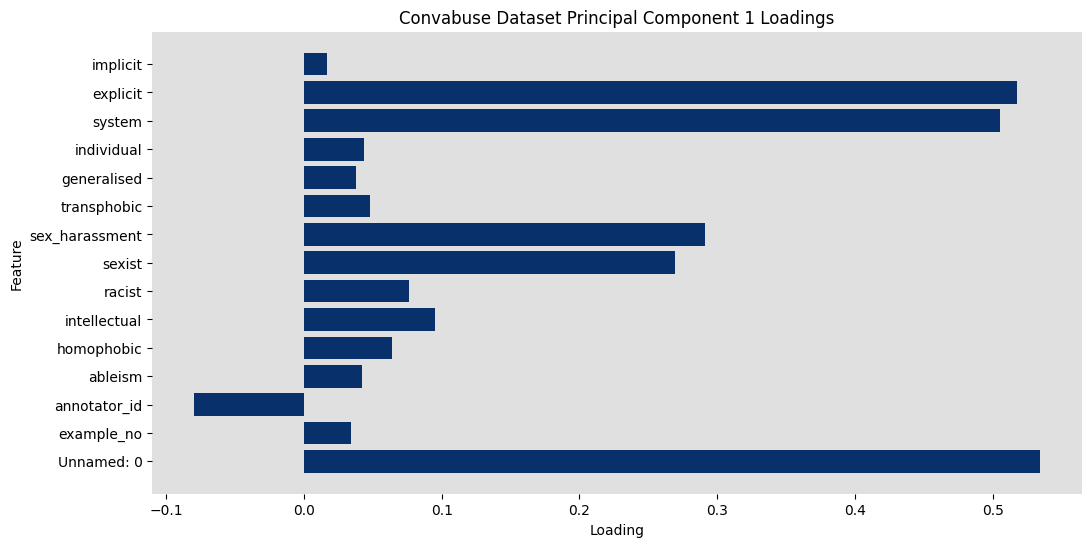

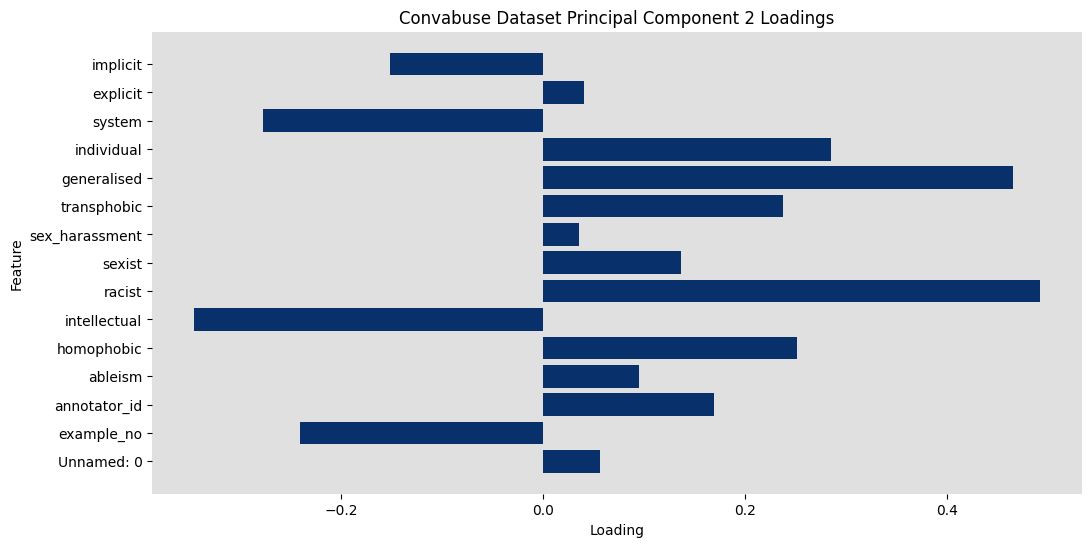

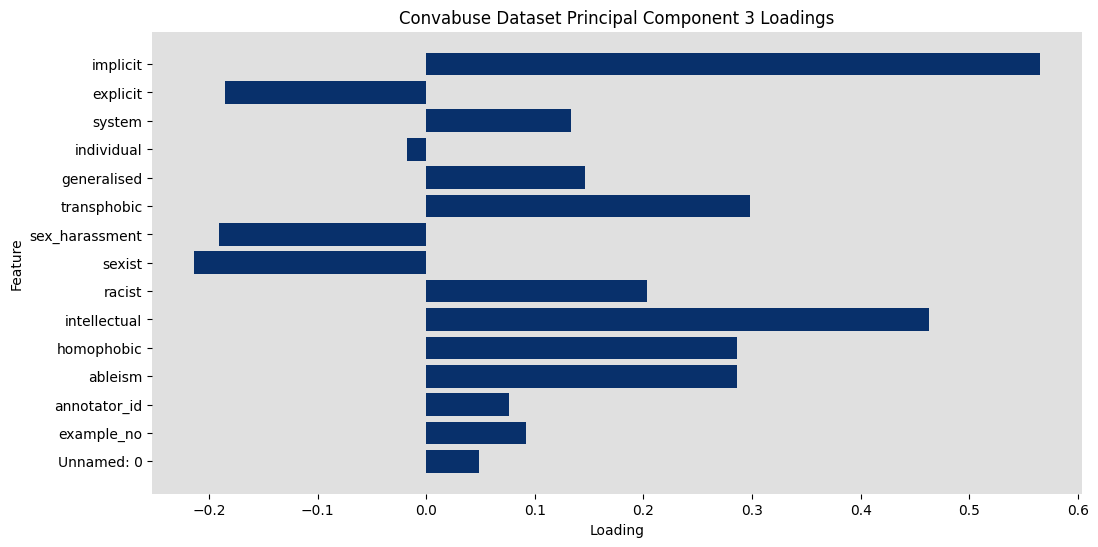

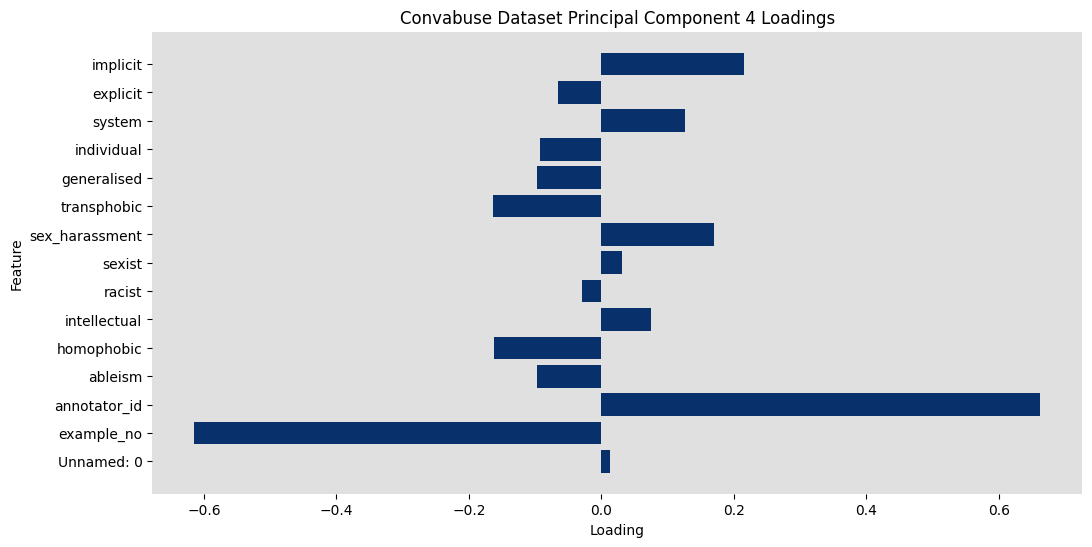

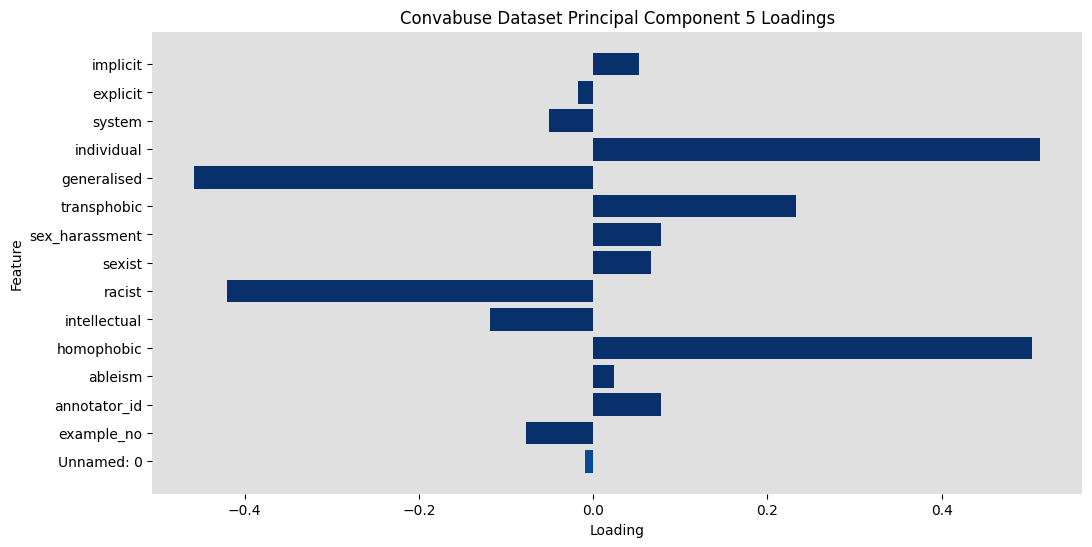

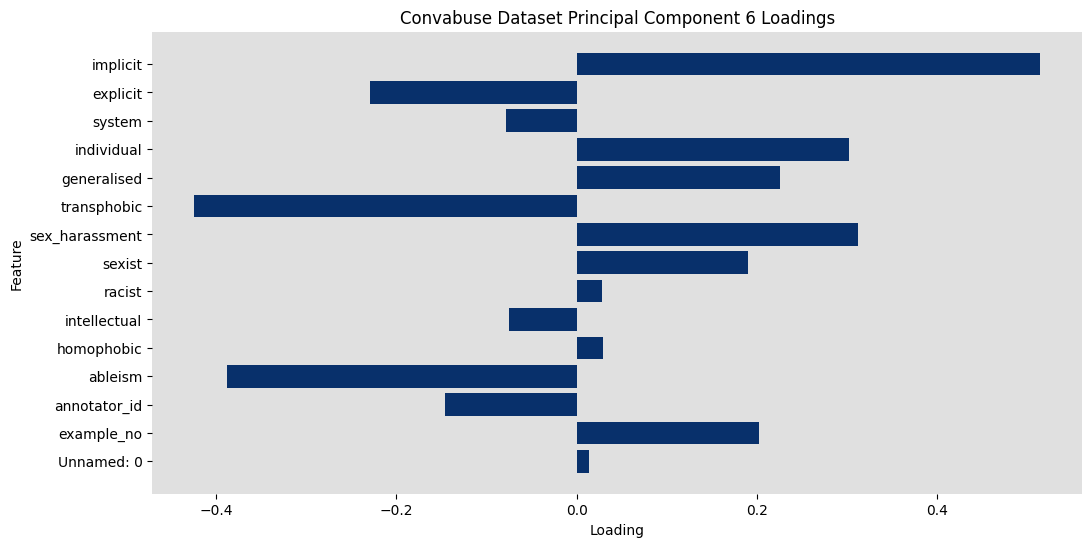

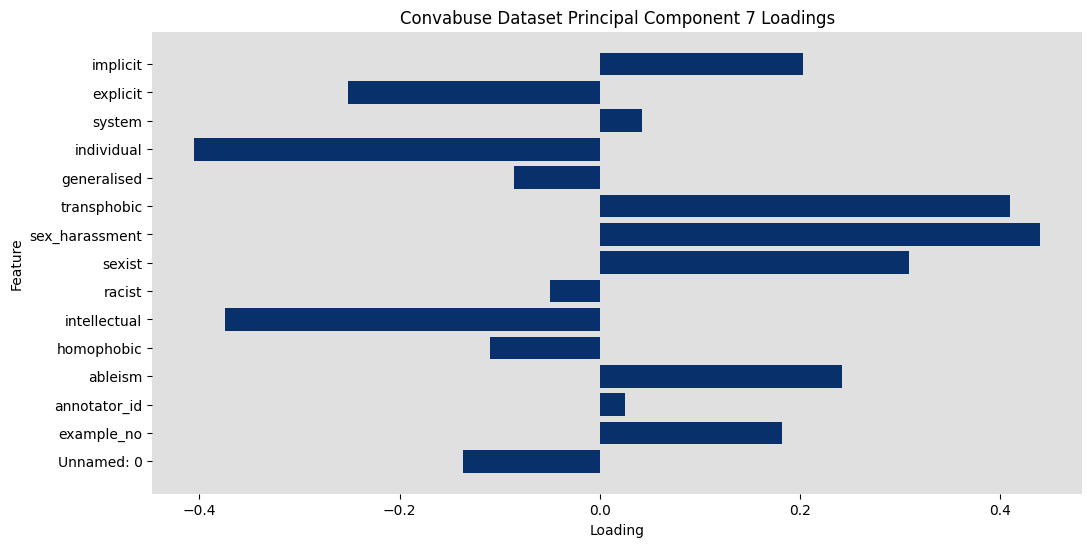

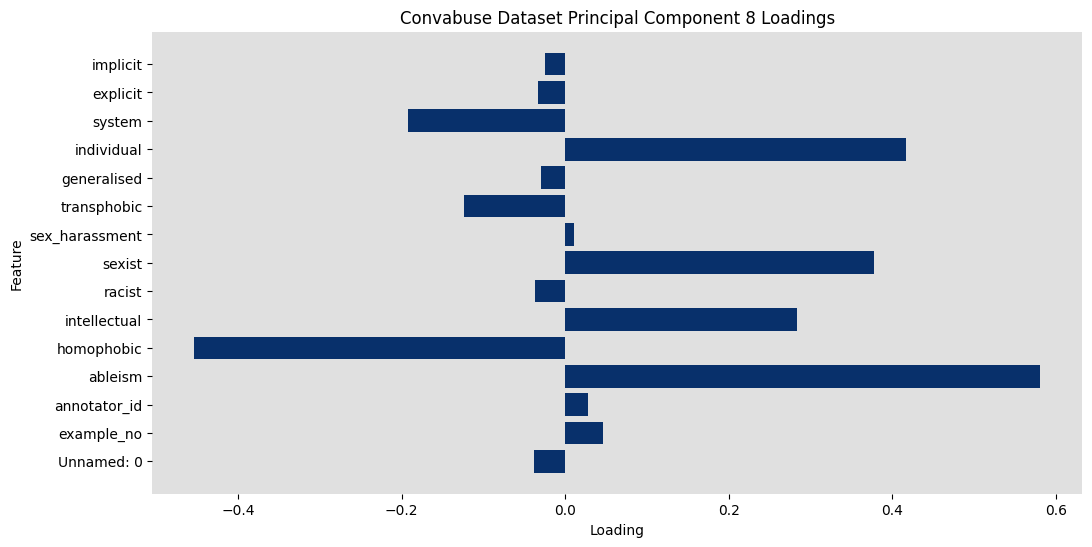

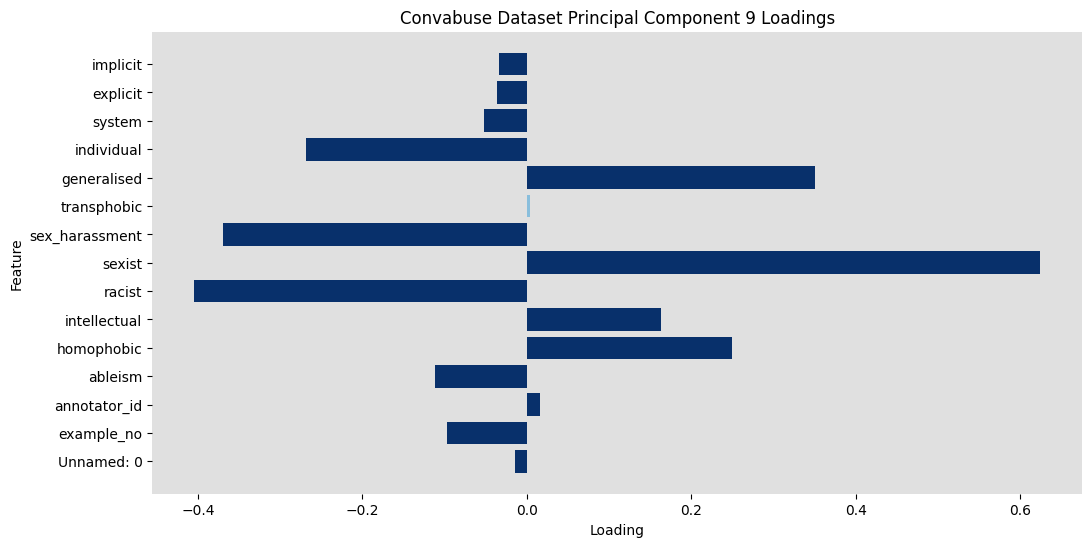

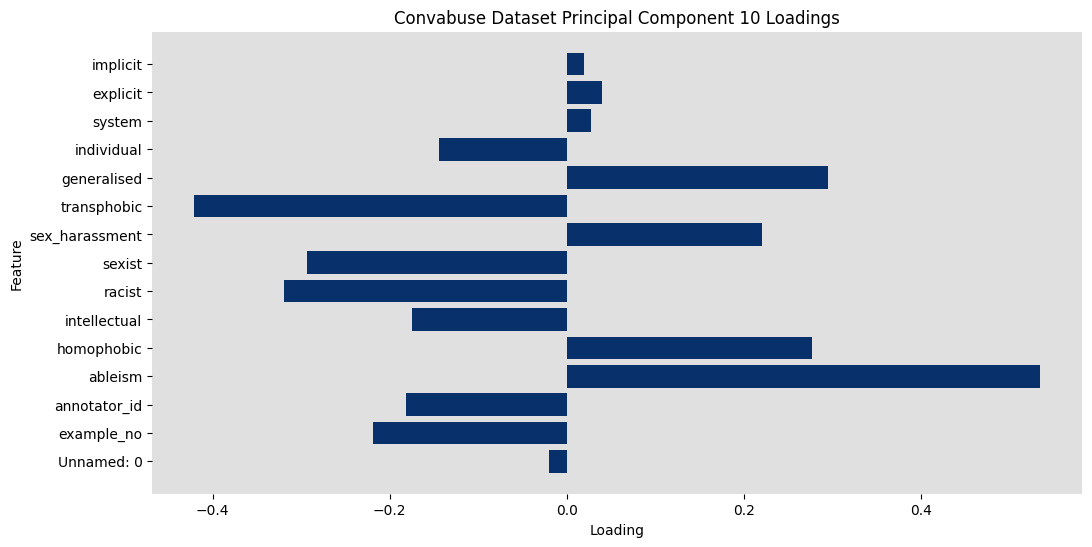

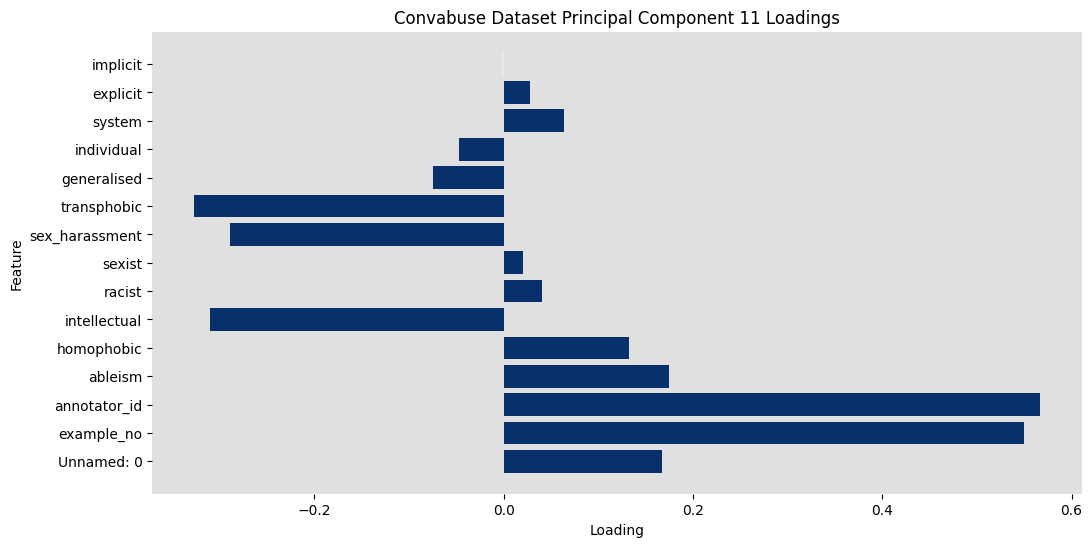

In [20]:
# Use a for loop to plot the loadings per feature as a horizontal bar plot
for i in range(11):
    plt.figure(figsize=(12, 6))

    # Set the Blues color map
    plt.get_cmap("Blues")

    # Plot the loadings without normalization
    loadings = convabuse_pcas.components_[i]
    plt.barh(range(len(loadings)), loadings, color=plt.get_cmap("Blues")(abs(loadings*100)))

    # Set the background color
    plt.gca().set_facecolor("#e0e0e0")

    # Remove the borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Set the y-ticks to show the feature names
    plt.yticks(range(len(loadings)), convabuse_X_train.columns)

    # Set the title and labels
    plt.title(f"Convabuse Dataset Principal Component {i + 1} Loadings")
    plt.xlabel("Loading")
    plt.ylabel("Feature")
    plt.show()
    plt.close()

In [21]:
# Perform PCA on the convabuse dataset
dynamically_generated_hate_speech_pcas = decomposition.PCA(n_components=9)
dynamically_generated_hate_speech_pcas.fit(dynamically_generated_hate_speech_X_train)

PCA(n_components=9)

In [22]:
print(dynamically_generated_hate_speech_pcas.explained_variance_ratio_)
print(np.sum(dynamically_generated_hate_speech_pcas.explained_variance_ratio_))
print(dynamically_generated_hate_speech_pcas.explained_variance_)

[0.25232885 0.09269    0.08909143 0.088346   0.08607974 0.08462766
 0.08409064 0.08007984 0.0776712 ]
0.9350053468571348
[3.00926356 1.10541721 1.06250072 1.05361083 1.02658354 1.00926598
 1.00286151 0.95502886 0.92630354]


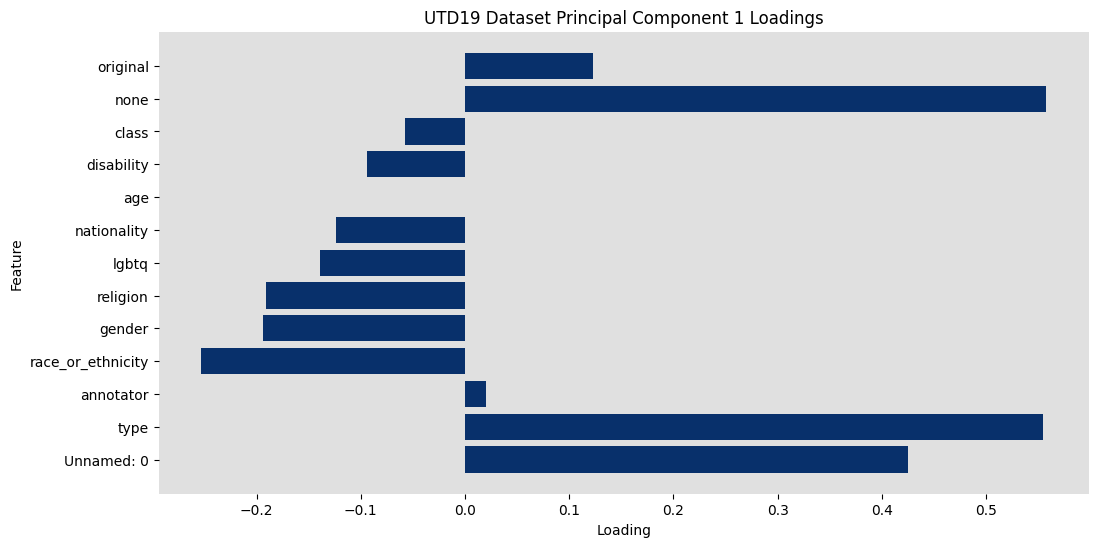

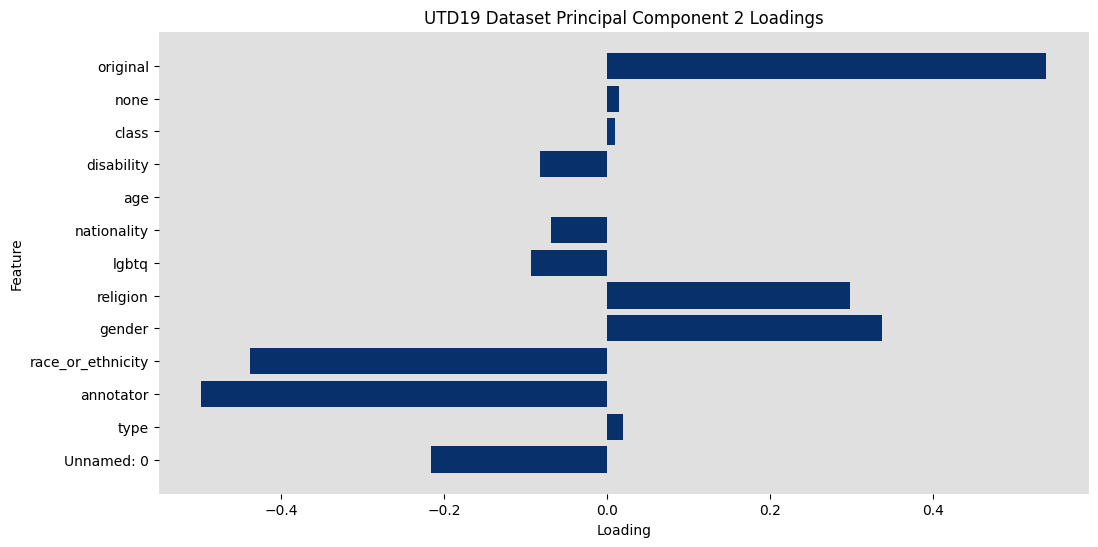

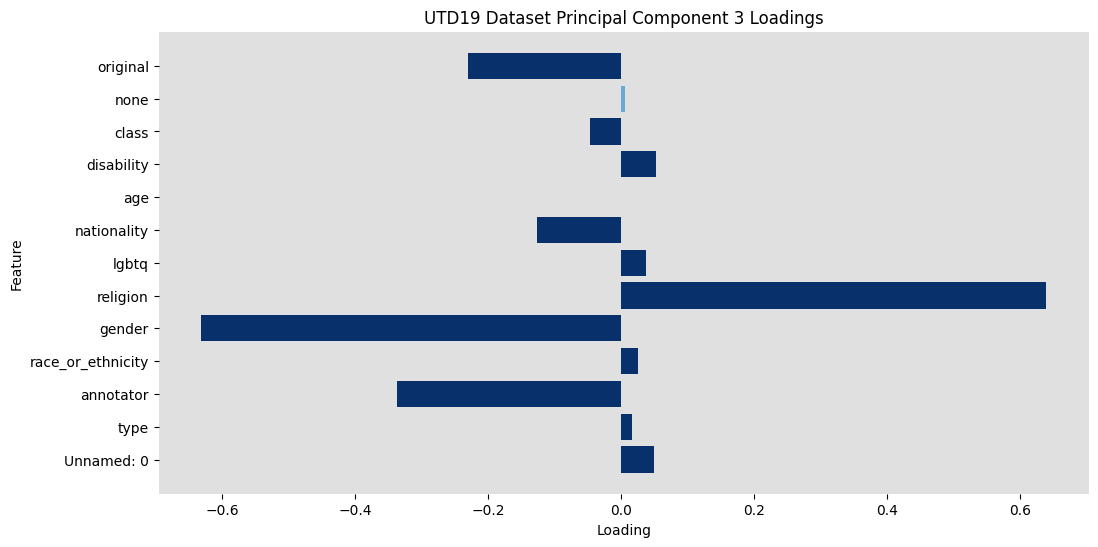

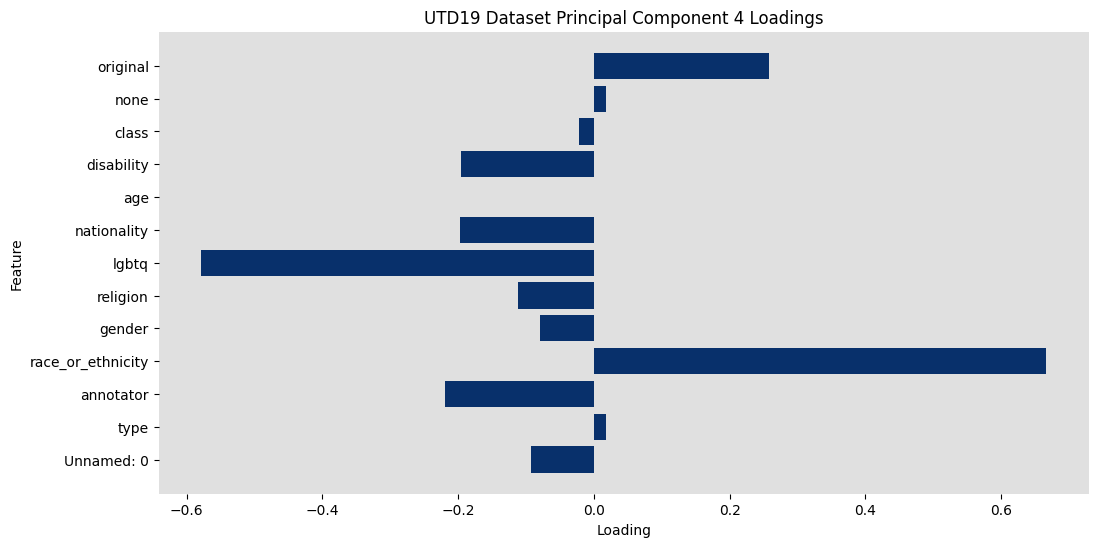

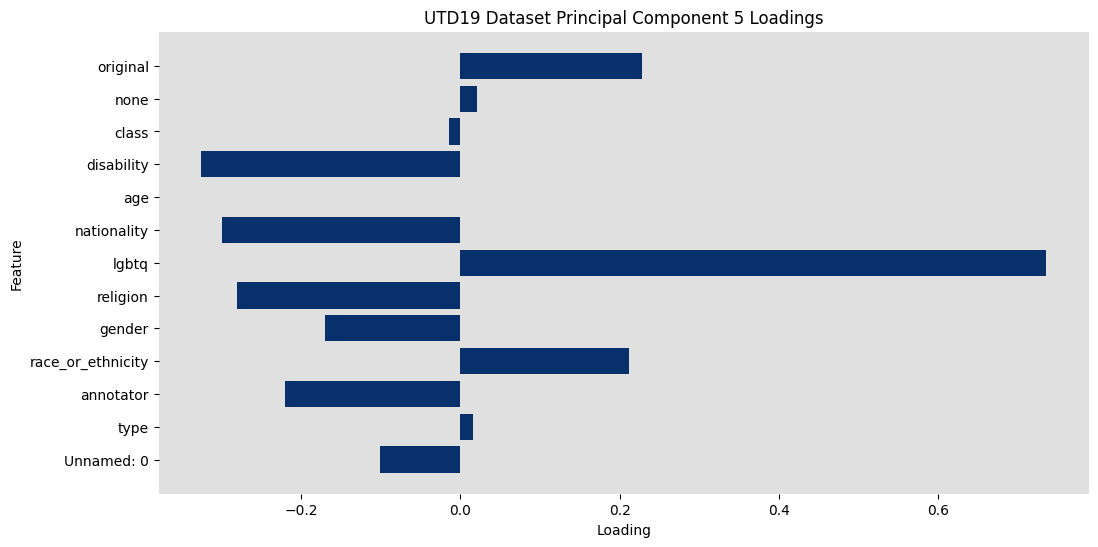

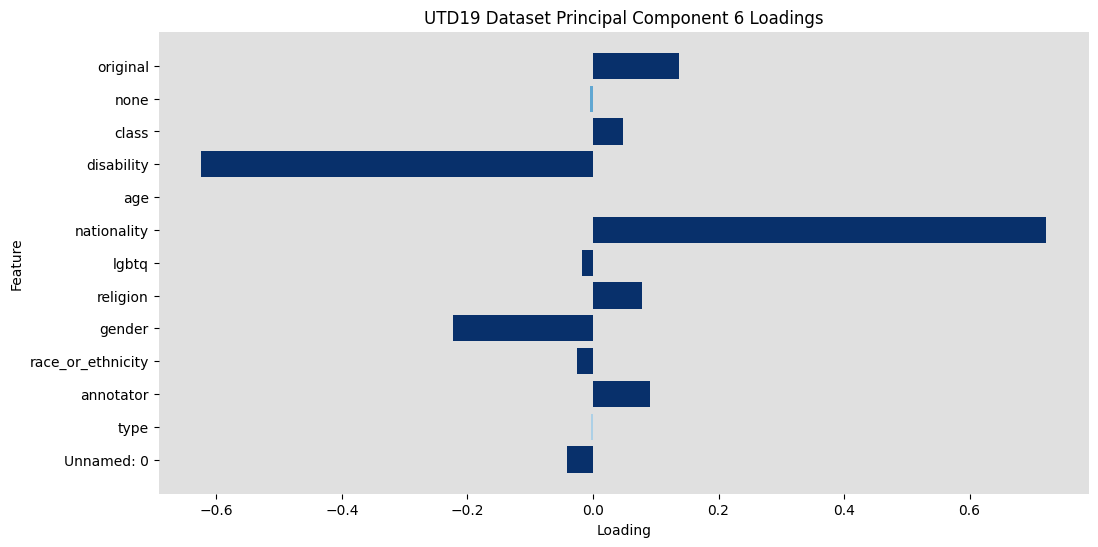

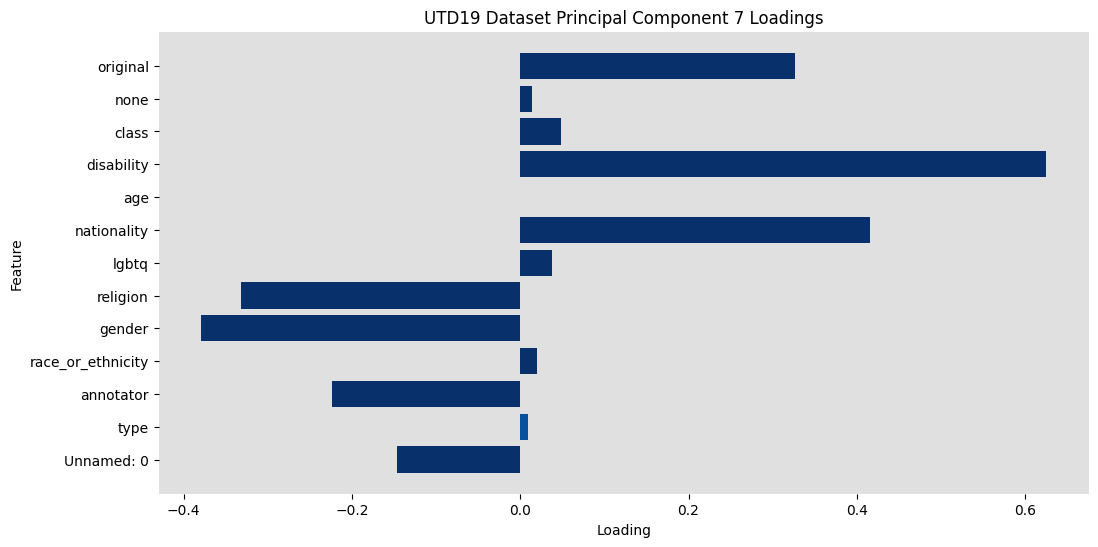

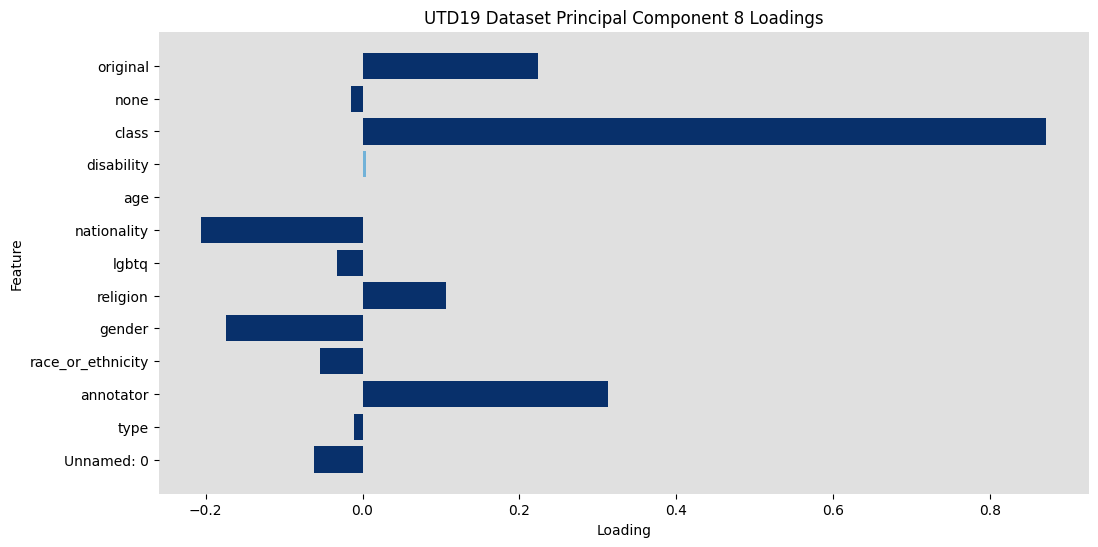

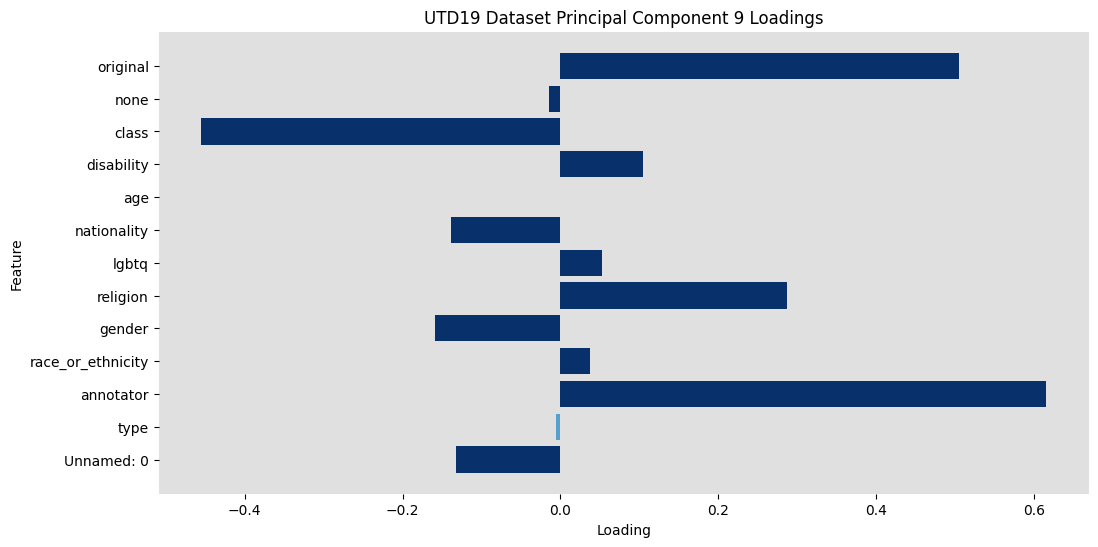

In [23]:
# Use a for loop to plot the loadings per feature as a horizontal bar plot
for i in range(9):
    plt.figure(figsize=(12, 6))

    # Set the Blues color map
    plt.get_cmap("Blues")

    # Plot the loadings without normalization
    loadings = dynamically_generated_hate_speech_pcas.components_[i]
    plt.barh(range(len(loadings)), loadings, color=plt.get_cmap("Blues")(abs(loadings*100)))

    # Set the background color
    plt.gca().set_facecolor("#e0e0e0")

    # Remove the borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Set the y-ticks to show the feature names
    plt.yticks(range(len(loadings)), dynamically_generated_hate_speech_X_train.columns)

    # Set the title and labels
    plt.title(f"UTD19 Dataset Principal Component {i + 1} Loadings")
    plt.xlabel("Loading")
    plt.ylabel("Feature")
    plt.show()
    plt.close()

In [24]:
# Perform PCA on the convabuse dataset
online_abusive_attacks_pcas = decomposition.PCA(n_components=3)
online_abusive_attacks_pcas.fit(online_abusive_attacks_X_train)

PCA(n_components=3)

In [25]:
print(online_abusive_attacks_pcas.explained_variance_ratio_)
print(np.sum(online_abusive_attacks_pcas.explained_variance_ratio_))
print(online_abusive_attacks_pcas.explained_variance_)

[0.58505795 0.22642157 0.15228461]
0.9637641257289682
[2.25418868 0.87238697 0.58674231]


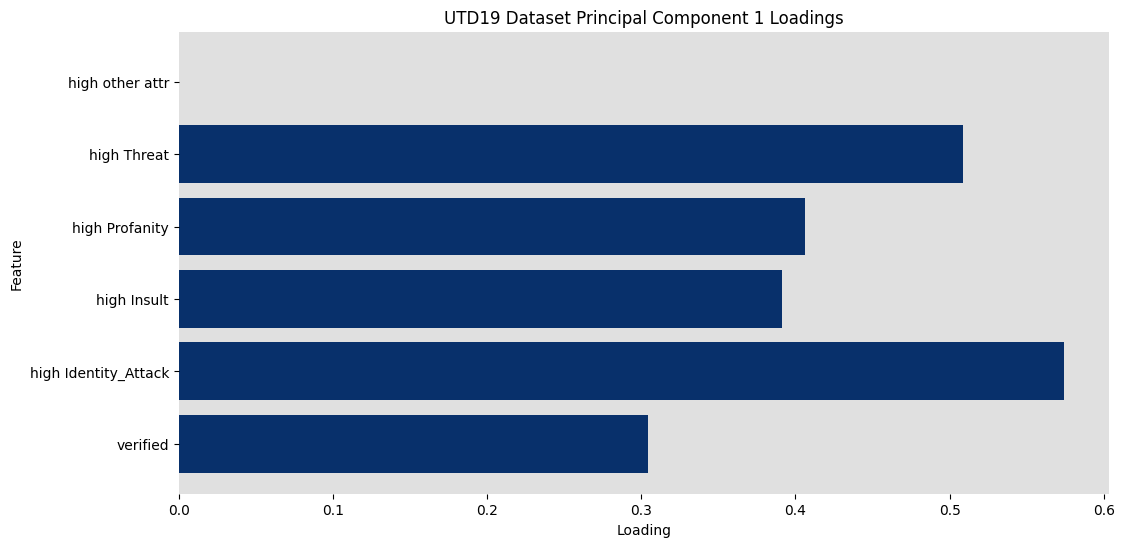

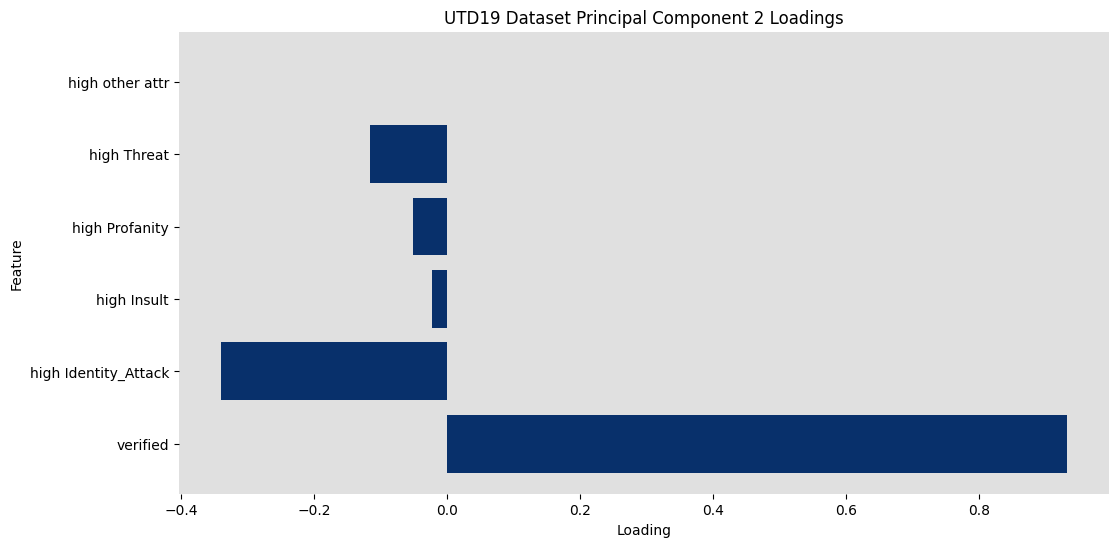

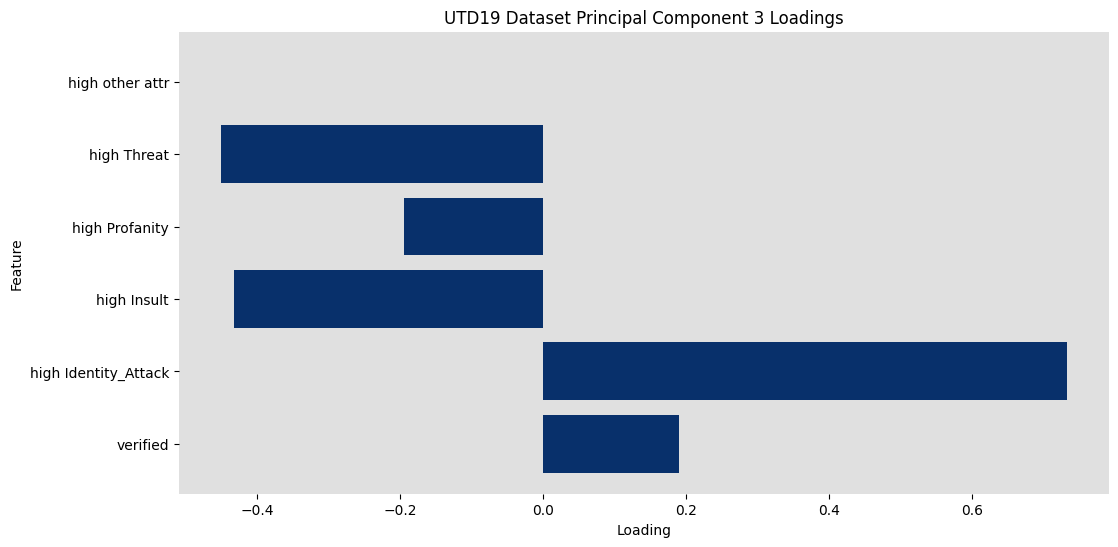

In [26]:
# Use a for loop to plot the loadings per feature as a horizontal bar plot
for i in range(3):
    plt.figure(figsize=(12, 6))

    # Set the Blues color map
    plt.get_cmap("Blues")

    # Plot the loadings without normalization
    loadings = online_abusive_attacks_pcas.components_[i]
    plt.barh(range(len(loadings)), loadings, color=plt.get_cmap("Blues")(abs(loadings*100)))

    # Set the background color
    plt.gca().set_facecolor("#e0e0e0")

    # Remove the borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Set the y-ticks to show the feature names
    plt.yticks(range(len(loadings)), online_abusive_attacks_X_train.columns)

    # Set the title and labels
    plt.title(f"UTD19 Dataset Principal Component {i + 1} Loadings")
    plt.xlabel("Loading")
    plt.ylabel("Feature")
    plt.show()
    plt.close()

In [27]:
# Perform PCA on the convabuse dataset
us_elections_2020_hate_speech_pcas = decomposition.PCA(n_components=3)
us_elections_2020_hate_speech_pcas.fit(us_elections_2020_hate_speech_X_train)

PCA(n_components=3)

In [28]:
print(us_elections_2020_hate_speech_pcas.explained_variance_ratio_)
print(np.sum(us_elections_2020_hate_speech_pcas.explained_variance_ratio_))
print(us_elections_2020_hate_speech_pcas.explained_variance_)

[0.39994533 0.31783265 0.17777303]
0.8955510039260417
[1.60326164 1.27409639 0.7126391 ]


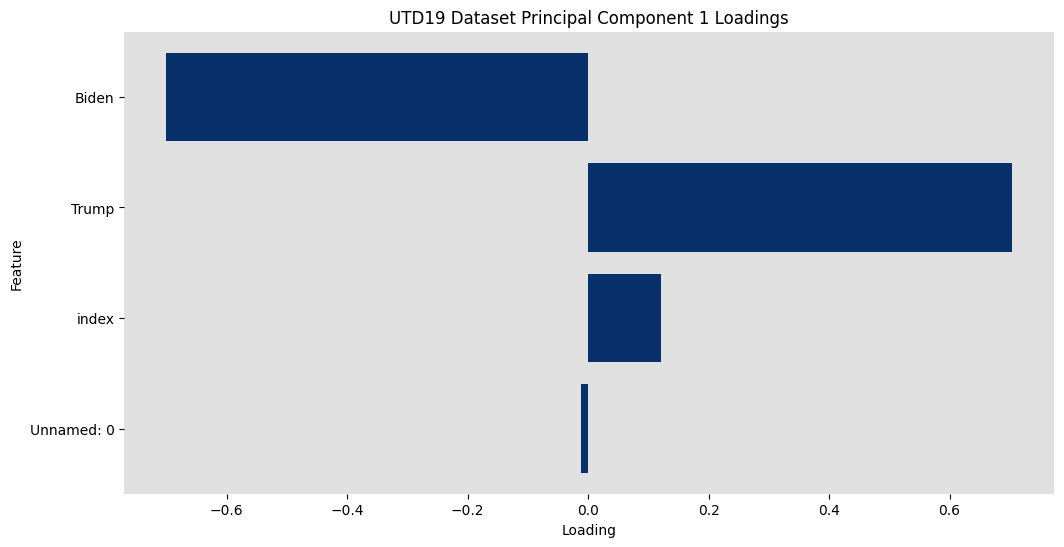

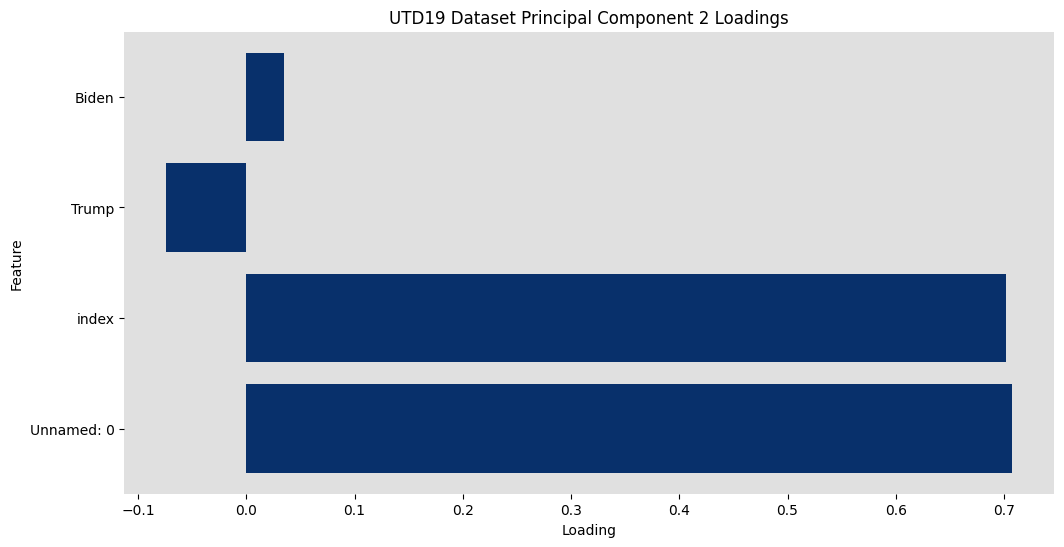

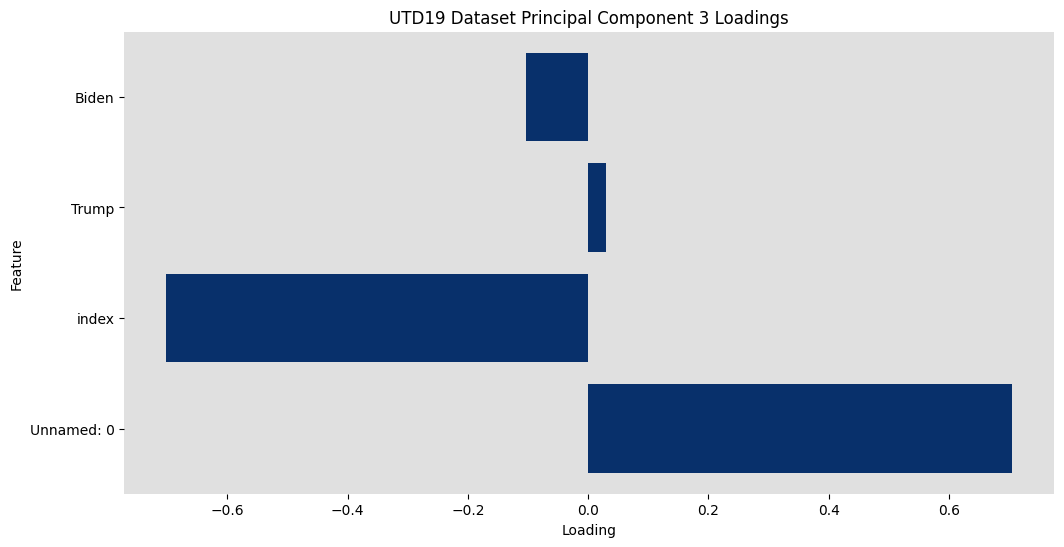

In [29]:
# Use a for loop to plot the loadings per feature as a horizontal bar plot
for i in range(3):
    plt.figure(figsize=(12, 6))

    # Set the Blues color map
    plt.get_cmap("Blues")

    # Plot the loadings without normalization
    loadings = us_elections_2020_hate_speech_pcas.components_[i]
    plt.barh(range(len(loadings)), loadings, color=plt.get_cmap("Blues")(abs(loadings*100)))

    # Set the background color
    plt.gca().set_facecolor("#e0e0e0")

    # Remove the borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Set the y-ticks to show the feature names
    plt.yticks(range(len(loadings)), us_elections_2020_hate_speech_X_train.columns)

    # Set the title and labels
    plt.title(f"UTD19 Dataset Principal Component {i + 1} Loadings")
    plt.xlabel("Loading")
    plt.ylabel("Feature")
    plt.show()
    plt.close()